## Question 1

In [1]:
pip install dask

Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
os.getcwd()

'C:\\Users\\Majdal\\Desktop\\MBA\\machine learning\\assignment#2'

In [8]:
%matplotlib inline
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import logging
# configure logger. Can be logging.Info or logging.Error to control printouts during training
logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s', level = logging.ERROR) 

root_notebook_folder = os.path.abspath('.')
data_folder = os.path.abspath('C:\\Users\\Majdal\\Desktop\\MBA\\machine learning\\assignment#2')

In [9]:
#loading the csv file by dask after extracting it 
from dask import dataframe as dd
import time

start = time.time()
df = dd.read_csv('enwiki-latest.csv')
df.reset_index(drop=True)
end = time.time()
print("Read csv with dask: ",(end-start),"sec")

Read csv with dask:  0.0742793083190918 sec


In [10]:
#loading the zipfile by dask and reading it direct from zip file (I compressed it again by zip instead of bz2, i didnt find enough documentation about bz2 folders)
import dask
import dask.array as da
import dask.bag as db
from dask import delayed
import time
import datetime
import zipfile

zf = zipfile.ZipFile('enwiki-latest.zip') 
# if you want to see all files inside zip folder
# now read your csv file 
#df = dd.read_csv(zf.open('enwiki-latest.csv'))
df=dd.read_csv(zf.namelist())

In [11]:
df.head()

,index,title,content
0,0,Anarchism,anarchism is political philosophy and movement...
1,1,Autism,autism is developmental disorder characterized...
2,2,Albedo,diffusely reflected sunlight relative to vario...
3,3,A,or is the first letter and the first vowel let...
4,4,Alabama,alabama is state in the southeastern region of...


In [12]:
from pandas import option_context
with option_context('display.max_colwidth', 400):
     display(df.head(5))

,index,title,content
0,0,Anarchism,anarchism is political philosophy and movement that rejects all involuntary coercive forms of hierarchy it radically calls for the abolition of the state which it holds to be undesirable unnecessary and harmful the timeline of anarchism stretches back to prehistory when people lived in anarchistic societies long before the establishment of formal states kingdoms or empires with the rise of org...
1,1,Autism,autism is developmental disorder characterized by difficulties with social interaction and communication and by restricted and repetitive behavior parents often notice signs during the first three years of their child life these signs often develop gradually though some children with autism experience worsening in their communication and social skills after reaching developmental milestones at...
2,2,Albedo,diffusely reflected sunlight relative to various surface conditions albedo meaning whiteness is the measure of the diffuse reflection of solar radiation out of the total solar radiation and measured on scale from corresponding to black body that absorbs all incident radiation to corresponding to body that reflects all incident radiation surface albedo is defined as the ratio of radiosity to th...
3,3,A,or is the first letter and the first vowel letter of the modern english alphabet and the iso basic latin alphabet its name in english is pronounced plural aes it is similar in shape to the ancient greek letter alpha from which it derives the uppercase version consists of the two slanting sides of triangle crossed in the middle by horizontal bar the lowercase version can be written in two forms...
4,4,Alabama,alabama is state in the southeastern region of the united states it is bordered by tennessee to the north georgia to the east florida and the gulf of mexico to the south and mississippi to the west alabama is the th largest by area and the th most populous of the states with total of of inland waterways alabama has among the most of any state alabama is nicknamed the yellowhammer state after t...


In [13]:
# creating a Dask bag to find the total number of words and their frequencies and the 20 frequent words 
bag = db.from_sequence(np.random.randint(0,4, 10))
bag.frequencies().compute()

[(2, 3), (0, 3), (3, 3), (1, 1)]

In [14]:
text = db.read_text(zf.namelist())

In [21]:
#finding the 20 most frequent word in the file
words = text.str.split().flatten().frequencies().topk(20, key=lambda x: x[1])
top20 = words.compute()

In [22]:
top20

[('the', 183967586),
 ('of', 93951935),
 ('and', 76883976),
 ('in', 75611529),
 ('to', 52042805),
 ('was', 29795447),
 ('is', 23685588),
 ('for', 22767923),
 ('on', 22136435),
 ('as', 21981315),
 ('by', 19556881),
 ('with', 19077069),
 ('he', 15178983),
 ('at', 15100615),
 ('from', 14369066),
 ('that', 14142053),
 ('his', 12176173),
 ('it', 11682621),
 ('an', 10129909),
 ('were', 7930620)]

In [23]:
top20_df = pd.DataFrame (top20, columns = ['word','frequency'])

In [24]:
top20_df

,word,frequency
0,the,183967586
1,of,93951935
2,and,76883976
3,in,75611529
4,to,52042805
5,was,29795447
6,is,23685588
7,for,22767923
8,on,22136435
9,as,21981315


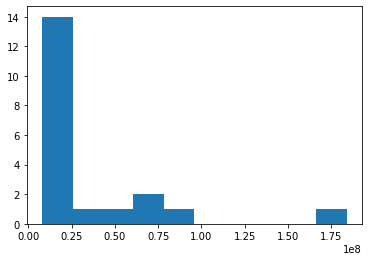

In [25]:
#plotting the 20 most frequent words in the file
plt.hist(top20_df.frequency)
plt.show()

In [26]:
#sum of the frequencies of most frequent words
top20_df['frequency'].sum()

742168529

In [27]:
#the number of times each word appears in the corpus 
words = text.str.split().flatten().frequencies().compute()

In [28]:
words 

[('index,title,content', 1),
 ('0,Anarchism,anarchism', 1),
 ('is', 23685588),
 ('political', 737381),
 ('philosophy', 167643),
 ('and', 76883976),
 ('movement', 436286),
 ('that', 14142053),
 ('rejects', 14642),
 ('all', 3786649),
 ('involuntary', 5793),
 ('coercive', 2759),
 ('forms', 252738),
 ('of', 93951935),
 ('hierarchy', 28451),
 ('it', 11682621),
 ('radically', 7971),
 ('calls', 127495),
 ('for', 22767923),
 ('the', 183967586),
 ('abolition', 21339),
 ('state', 2796685),
 ('which', 7338808),
 ('holds', 150922),
 ('to', 52042805),
 ('be', 6259446),
 ('undesirable', 6513),
 ('unnecessary', 15722),
 ('harmful', 15450),
 ('timeline', 45257),
 ('anarchism', 7111),
 ('stretches', 17132),
 ('back', 1189402),
 ('prehistory', 6905),
 ('when', 3355400),
 ('people', 1878089),
 ('lived', 332362),
 ('in', 75611529),
 ('anarchistic', 420),
 ('societies', 57444),
 ('long', 1219958),
 ('before', 1839218),
 ('establishment', 141640),
 ('formal', 111525),
 ('states', 2274122),
 ('kingdoms', 318

In [29]:
words_df= pd.DataFrame (words, columns = ['word','frequency'])

In [30]:
words_df.head(20)

,word,frequency
0,"index,title,content",1
1,"0,Anarchism,anarchism",1
2,is,23685588
3,political,737381
4,philosophy,167643
5,and,76883976
6,movement,436286
7,that,14142053
8,rejects,14642
9,all,3786649


In [31]:
#Total number of words in the Wikipedia dataset. 
words_df['frequency'].sum()

2736622134

In [32]:
#number of unique words
words_df['word'].nunique()

18927042

In [33]:
#calculating the fraction of the top frequent words 
top20_df['fraction']=(top20_df['frequency'])/(words_df['frequency'].sum())

In [34]:
top20_df

,word,frequency,fraction
0,the,183967586,0.067224
1,of,93951935,0.034331
2,and,76883976,0.028094
3,in,75611529,0.027630
4,to,52042805,0.019017
5,was,29795447,0.010888
6,is,23685588,0.008655
7,for,22767923,0.008320
8,on,22136435,0.008089
9,as,21981315,0.008032


<AxesSubplot:ylabel='Frequency'>

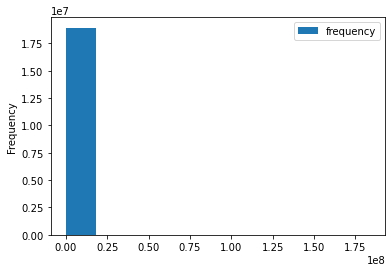

In [35]:
#Plot histogram of word frequencies
words_df.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

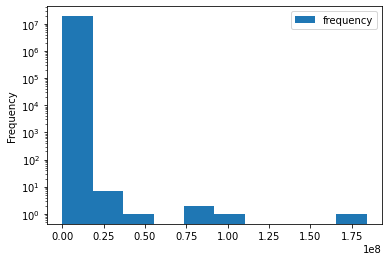

In [36]:
words_df.plot(kind='hist',log=True)

In [43]:
#checking outliers
q = words_df["frequency"].quantile(0.99)

In [44]:
q

255.0

In [46]:
q_hi= words_df[words_df["frequency"] < q]

In [51]:
q_hi.head(10)

,word,frequency
0,"index,title,content",1
1,"0,Anarchism,anarchism",1
145,prefigure,145
170,anarkhia,4
177,arkhos,11
189,anarchisme,45
209,weitling,146
321,citium,189
353,tragedians,185
402,mazdak,196


In [48]:
#the number of outliers with very low frequency < 255
len(q_hi)

18737527

<AxesSubplot:ylabel='Frequency'>

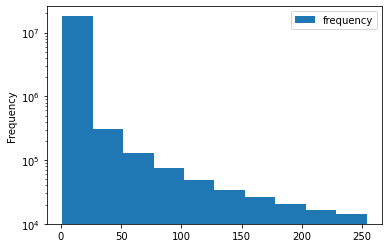

In [52]:
q_hi.plot(kind='hist',log=True)

In [7]:
#creating sub texts 
from itertools import islice
from multiprocessing import Pool
from collections import Counter
import os

NUM_OF_LINES = 1000
INPUT_FILE = 'enwiki-latest.csv'
POOL_SIZE = 10


def slice_huge_file():
    cnt = 0
    with open(INPUT_FILE,encoding='utf-8') as f:
        while True:
            next_n_lines = list(islice(f, NUM_OF_LINES))
            cnt += 1
            if not next_n_lines:
                break
            with open('sub_huge_{}.txt'.format(cnt), 'w') as out:
                out.writelines(next_n_lines)
                
if __name__ == '__main__':
    slice_huge_file()
    pool = Pool(POOL_SIZE)
    sub_files = [os.path.join('.',f) for f in os.listdir('.') if f.startswith('sub_huge')]

In [1]:
#compressing all the sub text to zip folder
file_name='wiki_sub_texts.zip'

In [6]:
#another way to count the number. We got the same number 
import zipfile
def count_all_words(file_name):
    number_of_words=0
    with zipfile.ZipFile(file_name,'r') as in_zip_file:
        for file_name in in_zip_file.infolist():
            if not file_name.is_dir():
                with in_zip_file.open(file_name.filename) as in_file:
                    data=in_file.read()
                    lines=data.split()
                    number_of_words+=len(lines)
                                   
    return  number_of_words

In [7]:
count_all_words(file_name)

2736622134

In [8]:
#counting the unique words and the number of the document and creating a vocab (using the same function of the last assignment)
import zipfile
def build_dictionary(text_file_name):
    vocab = dict()    
    number_of_documents = 0
    with zipfile.ZipFile(text_file_name,'r') as in_zip_file: #iterate through zip file
        for zipped_file_name in in_zip_file.infolist(): # iterate over all files within zip file. 
            for line in in_zip_file.open(zipped_file_name, 'r') : # read the file line by line 
                for word in line.decode('utf-8').split(): # add words into dictionary. 
                    if word not in vocab:
                        vocab[word] = len(vocab) # add word to vocab with a new index                    
                number_of_documents += 1
    return vocab,number_of_documents

In [9]:
vocab,number_of_documents=build_dictionary(file_name)

In [13]:
print("The number of unique words in the Wikipedia dataset",len(vocab))

The number of unique words in the Wikipedia dataset 18927042


In [14]:
print("The number of documents in the Wikipedia dataset",number_of_documents)

The number of documents in the Wikipedia dataset 5445713


In [12]:
vocab

{'index,title,content': 0,
 '0,Anarchism,anarchism': 1,
 'is': 2,
 'political': 3,
 'philosophy': 4,
 'and': 5,
 'movement': 6,
 'that': 7,
 'rejects': 8,
 'all': 9,
 'involuntary': 10,
 'coercive': 11,
 'forms': 12,
 'of': 13,
 'hierarchy': 14,
 'it': 15,
 'radically': 16,
 'calls': 17,
 'for': 18,
 'the': 19,
 'abolition': 20,
 'state': 21,
 'which': 22,
 'holds': 23,
 'to': 24,
 'be': 25,
 'undesirable': 26,
 'unnecessary': 27,
 'harmful': 28,
 'timeline': 29,
 'anarchism': 30,
 'stretches': 31,
 'back': 32,
 'prehistory': 33,
 'when': 34,
 'people': 35,
 'lived': 36,
 'in': 37,
 'anarchistic': 38,
 'societies': 39,
 'long': 40,
 'before': 41,
 'establishment': 42,
 'formal': 43,
 'states': 44,
 'kingdoms': 45,
 'or': 46,
 'empires': 47,
 'with': 48,
 'rise': 49,
 'organised': 50,
 'hierarchical': 51,
 'bodies': 52,
 'skepticism': 53,
 'towards': 54,
 'authority': 55,
 'also': 56,
 'rose': 57,
 'but': 58,
 'was': 59,
 'not': 60,
 'until': 61,
 'th': 62,
 'century': 63,
 'self': 64,
